In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

### Merging the Test and Train Datasets

Merge both datasets so data wrangling can be carried out simultaneously on the entire dataset at once

In [3]:
len(test.index)

367

In [4]:
len(train)

614

In [5]:
fulldata =  pd.concat([test, train], axis = 0)

In [6]:
len(test) + len(train) == len(fulldata)

True

We have successfully joined the test and train dataset together along the rows and confirmed no row was left out

### Exploring the dataset

In [7]:
fulldata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,NaN
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,NaN
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,NaN
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,NaN,Urban,NaN
4,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban,NaN


In [8]:
fulldata.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
print('The sum of entries in the  dataset is:', fulldata.size)

The sum of entries in the  dataset is: 12753


In [10]:
print('The shape of the dataset is: ', fulldata.shape)

The shape of the dataset is:  (981, 13)


In [11]:
print('The sum of null values in the dataset is: ', fulldata.isna().sum())

The sum of null values in the dataset is:  Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64


In [12]:
fulldata.nunique()

Loan_ID              981
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      752
CoapplicantIncome    437
LoanAmount           232
Loan_Amount_Term      12
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [13]:
fulldata.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [14]:
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 76.6+ KB


BRIEF INTRODUCTION

    The dataset has 13 columns with 8 being strings and 5 being integers.
    These columns are further divided hence:-
        A. Categorical column - Loan ID, Gender, Married, Dependents, Education, Self-employed, Property_Area, Loan_status
        B. Numerical columns- Applicant Income, Co-applicant Income, Loan Amount, Loan Amount term

    

In [15]:
fulldata.Gender.value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

In [16]:
fulldata.Married.value_counts()

Yes    631
No     347
Name: Married, dtype: int64

In [17]:
fulldata.Dependents.value_counts()

0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64

In [18]:
fulldata.Education.value_counts()

Graduate        763
Not Graduate    218
Name: Education, dtype: int64

In [19]:
fulldata.Self_Employed.value_counts()

No     807
Yes    119
Name: Self_Employed, dtype: int64

In [20]:
fulldata['Loan_Amount_Term'].value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [21]:
fulldata.Property_Area.value_counts()

Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

In [22]:
fulldata.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [23]:
fulldata.Credit_History.value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

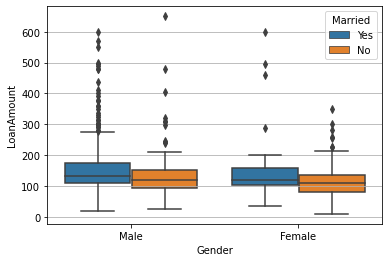

In [24]:
sns.boxplot(x = 'Gender', y = 'LoanAmount', hue = 'Married', data = fulldata)
plt.grid(axis = 'y')

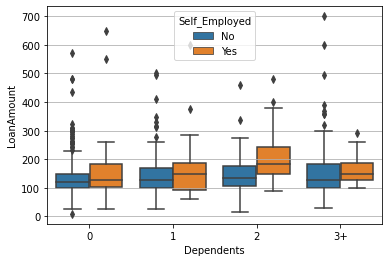

In [25]:
sns.boxplot(x = 'Dependents', y = 'LoanAmount', hue = 'Self_Employed', data = fulldata)
plt.grid(axis = 'y')

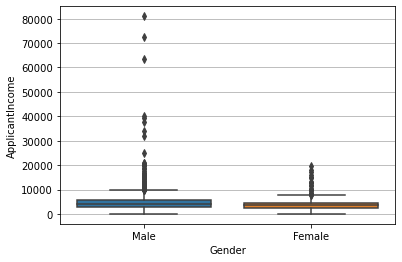

In [26]:
sns.boxplot(x = 'Gender', y = 'ApplicantIncome', data = fulldata)
plt.grid(axis = 'y')

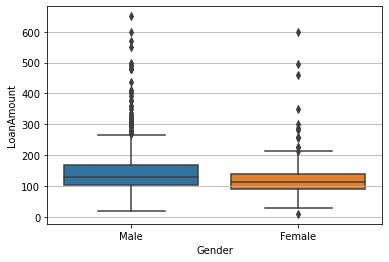

In [27]:
sns.boxplot(x = 'Gender', y = 'LoanAmount', data = fulldata)
plt.grid(axis = 'y')

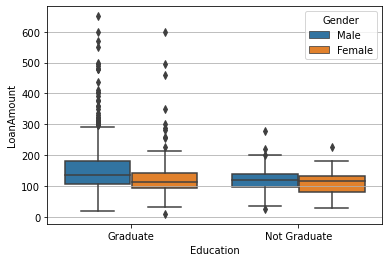

In [28]:
sns.boxplot(x = 'Education', y = 'LoanAmount', hue = 'Gender', data = fulldata)
plt.grid(axis = 'y')

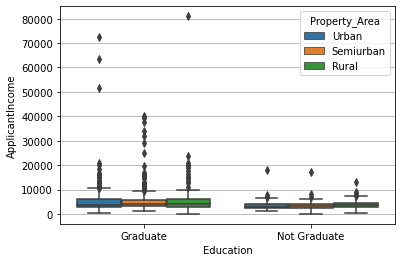

In [29]:
sns.boxplot(x = 'Education', y = 'ApplicantIncome', hue= 'Property_Area', data = fulldata)
plt.grid(axis = 'y')

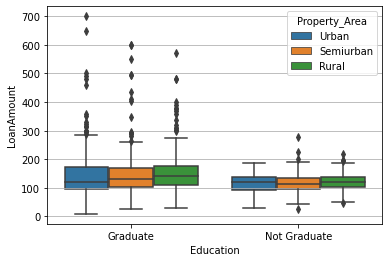

In [30]:
sns.boxplot(x = 'Education', y = 'LoanAmount', hue= 'Property_Area', data = fulldata)
plt.grid(axis = 'y')

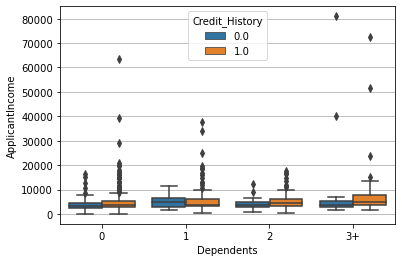

In [31]:
sns.boxplot(x = 'Dependents', y = 'ApplicantIncome', hue = 'Credit_History', data = fulldata)
plt.grid(axis = 'y')

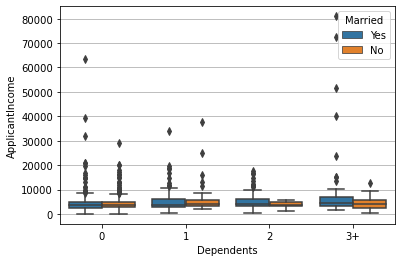

In [32]:
sns.boxplot(x = 'Dependents', y = 'ApplicantIncome', hue ='Married', data = fulldata)
plt.grid(axis = 'y')

In [33]:
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 92.6+ KB


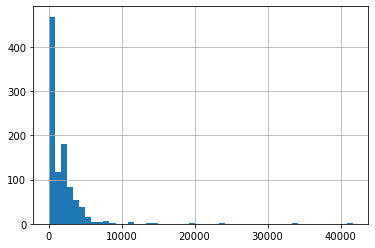

In [34]:
fulldata['CoapplicantIncome'].hist(bins = 50)

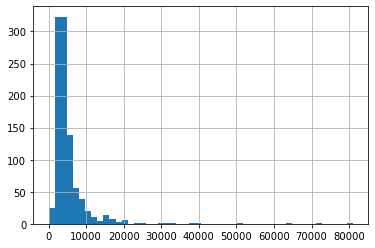

In [35]:
fulldata['ApplicantIncome'].hist(bins = 50)

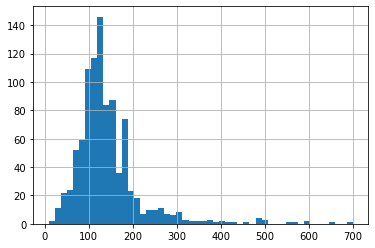

In [36]:
fulldata['LoanAmount'].hist(bins = 50)

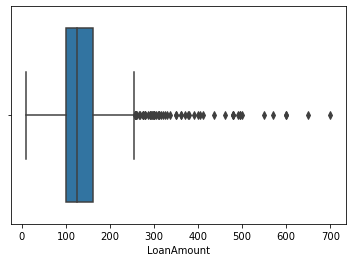

In [37]:
sns.boxplot(x = fulldata['LoanAmount'])

Given the nature of the dataset, it will not be neccessary to deal with outliers in this dataset.

##    the null columns
    Loan ID, 0
    Gender, 13
    Married, 3
    Dependents, 15 
    Education, 0
    Self-employed, 32
    Property_Area, 0
    Loan_status 0
    Applicant Income, 0
    Co-applicant Income, 0 
    Loan Amount, 22
    Loan Amount term 14

### filling the null data

In [38]:
fulldata.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [39]:
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 92.6+ KB


In [40]:
fulldata['Loan_Amount_Term'].mode()

0    360.0
dtype: float64

In [41]:
fulldata['Credit_History'].mean()

0.835920177383592

In [42]:
#for the integers and floats, fill with mode/mode

fulldata['LoanAmount'].fillna(train['LoanAmount'].mean(),inplace = True)
fulldata['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace = True)
fulldata['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace = True)

#for the objects, fill with mode

fulldata['Gender'].fillna(train['Gender'].mode()[0],inplace = True)
fulldata['Married'].fillna(train['Married'].mode()[0],inplace = True)
fulldata['Dependents'].fillna(train['Dependents'].mode()[0],inplace = True)
fulldata['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace = True)


In [43]:
fulldata.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

### Feature Engineering

Create A new column called Total Income where the applicant and coapplicant income will be summed and recorded for further calculations

In [44]:
fulldata['Total_Income'] = fulldata['ApplicantIncome'] + fulldata['CoapplicantIncome']

In [45]:
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             981 non-null    object 
 2   Married            981 non-null    object 
 3   Dependents         981 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      981 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         981 non-null    float64
 9   Loan_Amount_Term   981 non-null    float64
 10  Credit_History     981 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Total_Income       981 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 100.3+ KB


For applicant income, coapplicant income and loan amount, the values are so spread apart that they tend to look like outliers but given that its a loan applied for, I came to the conclusion that some people earn a whole lot and others might require high value loans for certain needs.

Hence, all Income data is going to be undergoing log transformation

In [46]:
fulldata['ApplicantIncome_log'] = np.log(fulldata['ApplicantIncome'])
fulldata['LoanAmount_log'] = np.log(fulldata['LoanAmount'])
fulldata['CoapplicantIncome_log'] = np.log(fulldata['CoapplicantIncome'])
fulldata['TotalIncome_log'] = np.log(fulldata['Total_Income'])

c:\program files (x86)\python38-32\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [47]:
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 613
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Loan_ID                981 non-null    object 
 1   Gender                 981 non-null    object 
 2   Married                981 non-null    object 
 3   Dependents             981 non-null    object 
 4   Education              981 non-null    object 
 5   Self_Employed          981 non-null    object 
 6   ApplicantIncome        981 non-null    int64  
 7   CoapplicantIncome      981 non-null    float64
 8   LoanAmount             981 non-null    float64
 9   Loan_Amount_Term       981 non-null    float64
 10  Credit_History         981 non-null    float64
 11  Property_Area          981 non-null    object 
 12  Loan_Status            614 non-null    object 
 13  Total_Income           981 non-null    float64
 14  ApplicantIncome_log    981 non-null    float64
 15  LoanAm

In [48]:
fulldata.describe()

c:\program files (x86)\python38-32\lib\site-packages\numpy\lib\function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,ApplicantIncome_log,LoanAmount_log,CoapplicantIncome_log,TotalIncome_log
count,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000
mean,5179.795107,1601.916330,142.618887,342.564730,0.849134,6781.711437,-inf,4.849760,-inf,8.649904
std,5695.104533,2718.772806,76.350440,64.482011,0.358101,6023.952550,NaN,0.468309,NaN,0.520593
min,0.000000,0.000000,9.000000,6.000000,0.000000,1442.000000,-inf,2.197225,-inf,7.273786
25%,2875.000000,0.000000,101.000000,360.000000,1.000000,4166.000000,7.963808,4.615121,NaN,8.334712
50%,3800.000000,1110.000000,128.000000,360.000000,1.000000,5314.000000,8.242756,4.852030,7.012115,8.578100
75%,5516.000000,2365.000000,160.000000,360.000000,1.000000,7308.000000,8.615408,5.075174,7.768533,8.896725
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,81000.000000,11.302204,6.551080,10.637465,11.302204


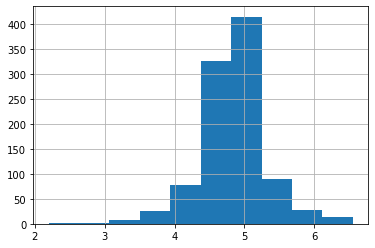

In [49]:
fulldata['LoanAmount_log'].hist()

### Encoding the categorical columns into an acceptable format

Sklearn works with numeric columns, so before proceeding, we would convert all non numeric columns to integers

In [50]:
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 613
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Loan_ID                981 non-null    object 
 1   Gender                 981 non-null    object 
 2   Married                981 non-null    object 
 3   Dependents             981 non-null    object 
 4   Education              981 non-null    object 
 5   Self_Employed          981 non-null    object 
 6   ApplicantIncome        981 non-null    int64  
 7   CoapplicantIncome      981 non-null    float64
 8   LoanAmount             981 non-null    float64
 9   Loan_Amount_Term       981 non-null    float64
 10  Credit_History         981 non-null    float64
 11  Property_Area          981 non-null    object 
 12  Loan_Status            614 non-null    object 
 13  Total_Income           981 non-null    float64
 14  ApplicantIncome_log    981 non-null    float64
 15  LoanAm

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [52]:
col = ['Property_Area', 'Self_Employed', 'Education', 'Dependents', 'Married', 'Gender', 'Credit_History']

for i in col:
    fulldata[i] = le.fit_transform(fulldata[i].astype('str'))

In [53]:
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 613
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Loan_ID                981 non-null    object 
 1   Gender                 981 non-null    int32  
 2   Married                981 non-null    int32  
 3   Dependents             981 non-null    int32  
 4   Education              981 non-null    int32  
 5   Self_Employed          981 non-null    int32  
 6   ApplicantIncome        981 non-null    int64  
 7   CoapplicantIncome      981 non-null    float64
 8   LoanAmount             981 non-null    float64
 9   Loan_Amount_Term       981 non-null    float64
 10  Credit_History         981 non-null    int32  
 11  Property_Area          981 non-null    int32  
 12  Loan_Status            614 non-null    object 
 13  Total_Income           981 non-null    float64
 14  ApplicantIncome_log    981 non-null    float64
 15  LoanAm

In [54]:
fulldata['Loan_Status'].isna().sum()

367

In [55]:
fulldata['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

### Distribution of categorical Variables

In [56]:
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 613
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Loan_ID                981 non-null    object 
 1   Gender                 981 non-null    int32  
 2   Married                981 non-null    int32  
 3   Dependents             981 non-null    int32  
 4   Education              981 non-null    int32  
 5   Self_Employed          981 non-null    int32  
 6   ApplicantIncome        981 non-null    int64  
 7   CoapplicantIncome      981 non-null    float64
 8   LoanAmount             981 non-null    float64
 9   Loan_Amount_Term       981 non-null    float64
 10  Credit_History         981 non-null    int32  
 11  Property_Area          981 non-null    int32  
 12  Loan_Status            614 non-null    object 
 13  Total_Income           981 non-null    float64
 14  ApplicantIncome_log    981 non-null    float64
 15  LoanAm

In [57]:
pd.crosstab(fulldata['Loan_Status'], fulldata['Credit_History'], margins =True)

Credit_History,0,1,All
Loan_Status,,,
N,82,110,192
Y,7,415,422
All,89,525,614


In [58]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [59]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

### Splitting the train and test data

We have cleaned the data, taken care of the null values and done some encoding.

at this point, we can return to our train and test data. and remove all unnecessary columns and all

In [60]:
fulldata.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income', 'ApplicantIncome_log', 'LoanAmount_log',
       'CoapplicantIncome_log', 'TotalIncome_log'],
      dtype='object')

In [61]:
to_drop = ['ApplicantIncome_log', 'LoanAmount_log', 'CoapplicantIncome_log', 'TotalIncome_log']
fulldata.drop(to_drop, axis = 1, inplace = True)

In [62]:
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             981 non-null    int32  
 2   Married            981 non-null    int32  
 3   Dependents         981 non-null    int32  
 4   Education          981 non-null    int32  
 5   Self_Employed      981 non-null    int32  
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         981 non-null    float64
 9   Loan_Amount_Term   981 non-null    float64
 10  Credit_History     981 non-null    int32  
 11  Property_Area      981 non-null    int32  
 12  Loan_Status        614 non-null    object 
 13  Total_Income       981 non-null    float64
dtypes: float64(4), int32(7), int64(1), object(2)
memory usage: 96.5+ KB


In [63]:
#save the test file
fulldata[fulldata.isna().any(axis = 1)].to_csv('test_modified.csv', index = False)

In [64]:
#drop the null values to get the train data
fulldata.dropna(axis = 0, inplace = True)

In [65]:
fulldata['Loan_Status'] =le.fit_transform(fulldata['Loan_Status'].astype('str'))

In [66]:
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    int32  
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int32  
 13  Total_Income       614 non-null    float64
dtypes: float64(4), int32(8), int64(1), object(1)
memory usage: 50.4+ KB


In [67]:
#drop the ID column
fulldata.drop('Loan_ID', inplace = True, axis = 1)
#saving the cleaned data
fulldata.to_csv('train_clean.csv', index = False)

In [68]:

test_mod = pd.read_csv('test_modified.csv')

In [69]:
test_mod.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income'],
      dtype='object')

In [70]:
test_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    int64  
 2   Married            367 non-null    int64  
 3   Dependents         367 non-null    int64  
 4   Education          367 non-null    int64  
 5   Self_Employed      367 non-null    int64  
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    float64
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    int64  
 11  Property_Area      367 non-null    int64  
 12  Loan_Status        0 non-null      float64
 13  Total_Income       367 non-null    float64
dtypes: float64(5), int64(8), object(1)
memory usage: 38.8+ KB


In [71]:
test_mod.drop(['Loan_Status', 'Loan_ID'], inplace = True, axis = 1)

In [72]:
test_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    int64  
 1   Married            367 non-null    int64  
 2   Dependents         367 non-null    int64  
 3   Education          367 non-null    int64  
 4   Self_Employed      367 non-null    int64  
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    float64
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    int64  
 10  Property_Area      367 non-null    int64  
 11  Total_Income       367 non-null    float64
dtypes: float64(4), int64(8)
memory usage: 34.5 KB


In [73]:
#saving the clean test data

test_mod.to_csv('test_clean.csv', index = False)